<a href="https://colab.research.google.com/github/Athugodage/RuLawSimplification/blob/main/corpus_analysis/text_cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/Athugodage/RuLawSimplification.git

fatal: destination path 'RuLawSimplification' already exists and is not an empty directory.


In [ ]:
!unzip '/content/RuLawSimplification/corpus/the_corpus.zip'

Archive:  /content/RuLawSimplification/corpus/the_corpus.zip
replace the_corpus.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [ ]:
import pandas as pd

df = pd.read_csv('the_corpus.csv')

In [ ]:
df.head()

,Название документа,Ссылка,Текст,Комментарий РГ,Date
0,Постановление Конституционного Суда Российской...,https://rg.ru/documents/2022/11/25/document-ob...,Именем Российской Федерации\n Конституционный...,"Бессрочный запрет на профессию для адвокатов, ...",2022-11-25
1,Постановление Пленума Верховного Суда Российск...,https://rg.ru/documents/2022/11/25/document-pl...,В целях обеспечения единства практики применен...,Пленум Верховного суда России утвердил постано...,2022-11-25
2,Федеральный закон от 21 ноября 2022 г. N 455-Ф...,https://rg.ru/documents/2022/11/24/document-po...,Принят Государственной Думой 15 ноября 2022 го...,Единое пособие для беременных женщин и граждан...,2022-11-24
3,Федеральный закон от 21 ноября 2022 г. N 443-Ф...,https://rg.ru/documents/2022/11/24/document-na...,Принят Государственной Думой 10 ноября 2022 го...,На сладкую газировку с 1 июля 2023 года введут...,2022-11-24
4,Федеральный закон от 21 ноября 2022 г. N 448-Ф...,https://rg.ru/documents/2022/11/24/document-by...,Принят Государственной Думой 10 ноября 2022 го...,Приостановленное в этом году бюджетное правило...,2022-11-24


In [ ]:
!pip install razdel
from razdel import sentenize

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import re
from tqdm import tqdm

tqdm.pandas()

n = 0

def cut_it(text):
    sents = list(sentenize(text))
    start = len(sents) if len(sents) < 40 else 35

    sents = [s.text for s in sents[-start:]] 
    
    new_text = ''
    for s in sents:
        new_text = new_text + ' ' + s
    return new_text
                


df['Cut_original'] = df['Текст'].progress_apply(cut_it)


100%|██████████| 2022/2022 [00:19<00:00, 103.61it/s]


In [ ]:
def cut_it(text):
    ## функции отличаются, т.к. в первая режет со второго предложения,
    ## а вторая с первого. Также тут меньше предложений в итоге

    sents = list(sentenize(text))
    end = len(sents) if len(sents) < 30 else 21
    if len(sents) > 30:
        end = 21
    elif len(sents) < 30:
        end = len(sents)

    sents = [s.text for s in sents[0:end]] 
    
    new_text = ''
    for s in sents:
        new_text = new_text + ' ' + s
    return new_text
                
df['Cut_comment'] = df['Комментарий РГ'].progress_apply(cut_it)

100%|██████████| 2022/2022 [00:01<00:00, 1568.89it/s]


In [ ]:
data = df.copy()

df[['Cut_original', 'Cut_comment']]

,Cut_original,Cut_comment
0,"При этом должны использоваться не чрезмерные,...","Бессрочный запрет на профессию для адвокатов,..."
1,"Суд, установив факт нарушения прав потребител...",Пленум Верховного суда России утвердил постан...
2,"В состав семьи, учитываемый при определении п...",Единое пособие для беременных женщин и гражда...
3,"2019, N 50, ст. 7201; 2022, N 27, ст. 4607) с...",На сладкую газировку с 1 июля 2023 года введу...
4,Перечисление средств по таким контрактам (дог...,Приостановленное в этом году бюджетное правил...
...,...,...
2017,"2006, N 52 (часть I), ст. 5498; 2007, N 46, с...",Через десять дней автомобиль можно будет пост...
2018,Правительство Российской Федерации постановля...,Правительство утвердило изменения в правила н...
2019,Правительство Российской Федерации постановля...,"Правительство приняло постановление, расширяю..."
2020,Правительство Российской Федерации постановля...,Специфическим образом теперь должны быть раск...


In [ ]:
df[['Cut_original', 'Cut_comment']].to_csv('cut_corpus.csv', index=False)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train, test = train_test_split(df, random_state=42, test_size=0.05)

# Tutorial

In the tutorial, we are going to fine-tune a German GPT-2 from the [Huggingface model hub](https://huggingface.co/models). As fine-tune, data we are using the [German Recipes Dataset](https://www.kaggle.com/sterby/german-recipes-dataset), which consists of 12190 german recipes with metadata crawled from [chefkoch.de](http://chefkoch.de/).

The idea is we use the recipe description to fine-tune our GPT-2 to let us write recipes we can cook.

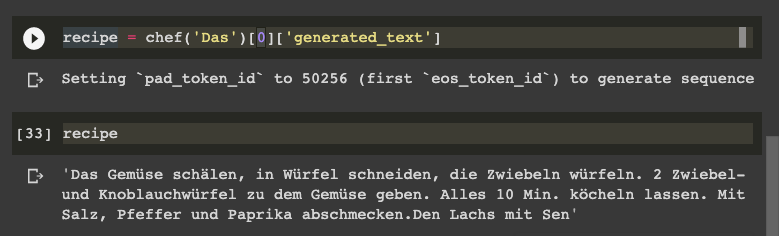

I am using Google Colab with a GPU runtime for this tutorial. If you are not sure how to use a GPU Runtime take a look here.

## **What are we going to do:**

- load the dataset from kaggle
- prepare the dataset and build a ``TextDataset``
- load the pre-trained GPT-2 model and tokenizer
- initialize ``Trainer`` with ``TrainingArguments``
- train and save the model
- test the model

In [ ]:
!pip install sacremoses
!pip install sacrebleu
!pip install transformers
!pip install torch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!nvidia-smi

Thu Mar 16 20:53:37 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   49C    P0    25W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("sberbank-ai/rugpt3small_based_on_gpt2")

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [ ]:
train = train.drop(['Название документа', "Ссылка", 'Date'], axis=1)
test = test.drop(['Название документа', "Ссылка", 'Date'], axis=1)

In [ ]:
train.columns = ["text", "commentary"]
test.columns = ["text", "commentary"]

In [ ]:
tokenizer.add_special_tokens({'pad_token': '[PAD]'})

1

In [ ]:
import torch
from transformers import TextDataset, DataCollatorForLanguageModeling
from transformers import TrainingArguments, Trainer
from datasets import Dataset



def tokenize_function(examples):
    law_tokens = tokenizer(examples["text"], truncation=True, max_length=512, padding='max_length', return_special_tokens_mask=True)
    special_tok = tokenizer(" [SEP] ", return_special_tokens_mask=True)
    commentary_tokens = tokenizer(examples["commentary"], truncation=True, max_length=512, padding='max_length', return_special_tokens_mask=True)
    tokens = {key: torch.cat((torch.tensor(law_tokens[key]), torch.tensor(special_tok[key]), torch.tensor(commentary_tokens[key])), dim=-1) for key in law_tokens}
    return tokens

# Convert pandas DataFrames to Hugging Face Dataset objects
train_dataset = Dataset.from_pandas(train)
test_dataset = Dataset.from_pandas(test)
# Tokenize the train and validation datasets
ds = train_dataset.map(tokenize_function, remove_columns=['text', 'commentary', '__index_level_0__'])
val = test_dataset.map(tokenize_function, remove_columns=['text', 'commentary', '__index_level_0__'])

# Set up the data collator
data_collator = DataCollatorForLanguageModeling(tokenizer=tokenizer, mlm=False)



Map:   0%|          | 0/1920 [00:00<?, ? examples/s]

Map:   0%|          | 0/102 [00:00<?, ? examples/s]

In [ ]:
!nvidia-smi

Thu Mar 16 20:58:46 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   48C    P0    25W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from transformers import Trainer, TrainingArguments, AutoModelWithLMHead

model = AutoModelWithLMHead.from_pretrained("sberbank-ai/rugpt3small_based_on_gpt2")


training_args = TrainingArguments(
    output_dir="output",
    num_train_epochs=3,
    per_device_train_batch_size=3,
    per_device_eval_batch_size=4,
    gradient_accumulation_steps=4,
    evaluation_strategy="epoch",
    save_strategy="epoch",
    learning_rate=5e-5,
    weight_decay=0.01,
    logging_dir="logs",
)

# Set up the Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=ds,
    eval_dataset=val,
    data_collator=data_collator,
)

# Train the model
trainer.train()


/usr/local/lib/python3.9/dist-packages/transformers/models/auto/modeling_auto.py:1248: FutureWarning: The class `AutoModelWithLMHead` is deprecated and will be removed in a future version. Please use `AutoModelForCausalLM` for causal language models, `AutoModelForMaskedLM` for masked language models and `AutoModelForSeq2SeqLM` for encoder-decoder models.
  warnings.warn(
loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--sberbank-ai--rugpt3small_based_on_gpt2/snapshots/f2f7c585b05a16726efe8974586e10b4d5939082/config.json
Model config GPT2Config {
  "_name_or_path": "sberbank-ai/rugpt3small_based_on_gpt2",
  "activation_function": "gelu_new",
  "architectures": [
    "GPT2LMHeadModel"
  ],
  "attn_pdrop": 0.1,
  "bos_token_id": 50256,
  "embd_pdrop": 0.1,
  "eos_token_id": 50256,
  "gradient_checkpointing": false,
  "initializer_range": 0.02,
  "layer_norm_epsilon": 1e-05,
  "model_type": "gpt2",
  "n_ctx": 2048,
  "n_embd": 768,
  "n_head": 12,
  

Epoch,Training Loss,Validation Loss


KeyboardInterrupt: ignored

In [ ]:
from transformers import pipeline

In [ ]:
test.iloc[0]["text"][:2400] + " [SEP] "

'Принят Государственной Думой 30 мая 2019 года  Одобрен Советом Федерации 11 июня 2019 года  Статья 1  Внести в Федеральный закон от 24 июля 2007 года N 221-ФЗ "О кадастровой деятельности" (Собрание законодательства Российской Федерации, 2007, N 31, ст. 4017; 2013, N 30, ст. 4083; 2014, N 52, ст. 7558; 2016, N 27, ст. 4294; 2017, N 31, ст. 4766; 2018, N 53, ст. 8464) следующие изменения:  1) статью 35 дополнить частью 11 следующего содержания:  "11. Кадастровые работы могут выполняться кадастровым инженером, являющимся работником юридического лица, на основании трудового договора в случае, если кадастровые работы выполняются для собственных нужд такого юридического лица. При этом заключение предусмотренного частью 1 настоящей статьи договора подряда не требуется.";  2) в статье 421:  а) в части 1:  пункт 2 изложить в следующей редакции:  "2) земельных участков, образование которых предусмотрено документами, указанными в части 6 настоящей статьи;";  пункт 3 изложить в следующей редакции

In [ ]:
device = model.device

In [ ]:
text_generator = pipeline("text-generation", model=model, tokenizer=tokenizer,device=0)

# Generate text
prompt = test.iloc[0]["text"][:2400] + " [SEP] "
generated_text = text_generator(prompt, max_length=1800, num_return_sequences=1)

Generate config GenerationConfig {
  "bos_token_id": 50256,
  "eos_token_id": 50256,
  "transformers_version": "4.26.1"
}

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


In [ ]:

generated_text

[{'generated_text': 'Принят Государственной Думой 30 мая 2019 года  Одобрен Советом Федерации 11 июня 2019 года  Статья 1  Внести в Федеральный закон от 24 июля 2007 года N 221-ФЗ "О кадастровой деятельности" (Собрание законодательства Российской Федерации, 2007, N 31, ст. 4017; 2013, N 30, ст. 4083; 2014, N 52, ст. 7558; 2016, N 27, ст. 4294; 2017, N 31, ст. 4766; 2018, N 53, ст. 8464) следующие изменения:  1) статью 35 дополнить частью 11 следующего содержания:  "11. Кадастровые работы могут выполняться кадастровым инженером, являющимся работником юридического лица, на основании трудового договора в случае, если кадастровые работы выполняются для собственных нужд такого юридического лица. При этом заключение предусмотренного частью 1 настоящей статьи договора подряда не требуется.";  2) в статье 421:  а) в части 1:  пункт 2 изложить в следующей редакции:  "2) земельных участков, образование которых предусмотрено документами, указанными в части 6 настоящей статьи;";  пункт 3 изложить 